In [1]:
# importing necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from urllib.request import urlopen
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set_style("darkgrid")  # grid

pd.options.mode.chained_assignment = None

In [2]:
# URL page we will be scraping
url = "https://www.basketball-reference.com/teams/CLE"
html = urlopen(url)
soup = BeautifulSoup(html)

# use findALL() to get the column headers
soup.findAll('tr', limit=2)

# use getText()to extract the text we need into a list
headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]

# exclude the first column as we will not need the ranking order from Basketball Reference for the analysis
headers = headers[1:]
headers

# avoid the first header row
rows = soup.findAll('tr')[1:]
player_stats = [[td.getText() for td in rows[i].findAll('td')]
            for i in range(len(rows))]

# creating the dataframe which will have all the required data
df = pd.DataFrame(player_stats, columns = headers)
df["seasons"] = 2021 - np.arange(52)

cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols] 

df = df.iloc[::-1]
df = df[:-1]
df.reset_index(drop=True, inplace=True)
df

,seasons,Lg,Team,W,L,W/L%,Finish,SRS,,,...,Rel Pace,ORtg,Rel ORtg,DRtg,Rel DRtg,,,Playoffs,Coaches,Top WS
0,1970,NBA,Cleveland Cavaliers,15,67,.183,4th of 4,-12.04,,,...,-4.5,92.3,-4.9,102.4,5.2,,,,B. Fitch (15-67),W. Wesley (4.1)
1,1971,NBA,Cleveland Cavaliers,23,59,.280,4th of 4,-7.90,,,...,-0.5,94.5,-3.4,101.4,3.5,,,,B. Fitch (23-59),B. Beard (5.9)
2,1972,NBA,Cleveland Cavaliers,32,50,.390,4th of 4,-2.64,,,...,-2.4,94.0,-2.8,96.5,-0.3,,,,B. Fitch (32-50),L. Wilkens (9.5)
3,1973,NBA,Cleveland Cavaliers,29,53,.354,4th of 4,-4.16,,,...,-3.7,96.0,-1.7,100.1,2.4,,,,B. Fitch (29-53),L. Wilkens (6.5)
4,1974,NBA,Cleveland Cavaliers,40,42,.488,3rd of 5,-0.31,,,...,-4.1,97.6,-0.1,98.0,0.3,,,,B. Fitch (40-42),D. Snyder (6.4)
5,1975,NBA,Cleveland Cavaliers*,49,33,.598,1st of 5,2.34,,,...,-3.9,99.5,1.2,97.0,-1.3,,,Lost E. Conf. Finals,B. Fitch (49-33),J. Brewer (7.9)
6,1976,NBA,Cleveland Cavaliers*,43,39,.524,4th of 6,1.08,,,...,-5.0,100.0,0.5,98.9,-0.6,,,Lost E. Conf. 1st Rnd.,B. Fitch (43-39),J. Chones (5.9)
7,1977,NBA,Cleveland Cavaliers*,43,39,.524,3rd of 6,0.44,,,...,-3.2,99.9,-1.0,99.4,-1.5,,,Lost E. Conf. 1st Rnd.,B. Fitch (43-39),E. Smith (6.8)
8,1978,NBA,Cleveland Cavaliers,30,52,.366,5th of 6,-3.57,,,...,-3.1,103.7,-0.1,107.3,3.5,,,,B. Fitch (30-52),C. Russell (6.7)
9,1979,NBA,Cleveland Cavaliers,37,45,.451,5th of 6,0.43,,,...,2.5,106.7,1.4,106.4,1.1,,,,S. Albeck (37-45),D. Robisch (8.6)


## Splitting data into two subsets: 
## i) Seasons LBJ played for Cavs
## ii) Seasons LBJ didn't play for Cavs

In [3]:
# converting data into numeric form as it is text by default
numeric_cols = ['W', 'L', 'W/L%', 'SRS', 'Pace', 'Rel Pace', 'ORtg', 'Rel ORtg', 'DRtg', 'Rel DRtg']
for c in numeric_cols:
    df[c] = pd.to_numeric(df[c], downcast="float")

In [4]:
# indices of the seasons lbj played for cavs
A = np.array([33, 34, 35, 36, 37, 38, 39, 44, 45, 46, 47])

# indices of the seasons lbj didn't play for cavs
B = np.arange(51)
B = np.array([i for i in B if i not in A])

dfa = df.iloc[A, :]
dfb = df.iloc[B, :]

# Analysis of team stats

## 1. LeBron's impact on Win Percentage

In [5]:
from scipy.stats import mannwhitneyu, ttest_ind

stat_name = 'W/L%'

mean_stat_with_lebron = np.mean(dfa[stat_name])
mean_stat_without_lebron = np.mean(dfb[stat_name])
print(mean_stat_with_lebron, mean_stat_without_lebron)

print(mannwhitneyu(dfa[stat_name], dfb[stat_name]))
print(ttest_ind(dfa[stat_name], dfb[stat_name]))


0.62090915 0.4134
MannwhitneyuResult(statistic=51.5, pvalue=5.8898743811615196e-05)
Ttest_indResult(statistic=4.64971198782784, pvalue=2.542067277914172e-05)


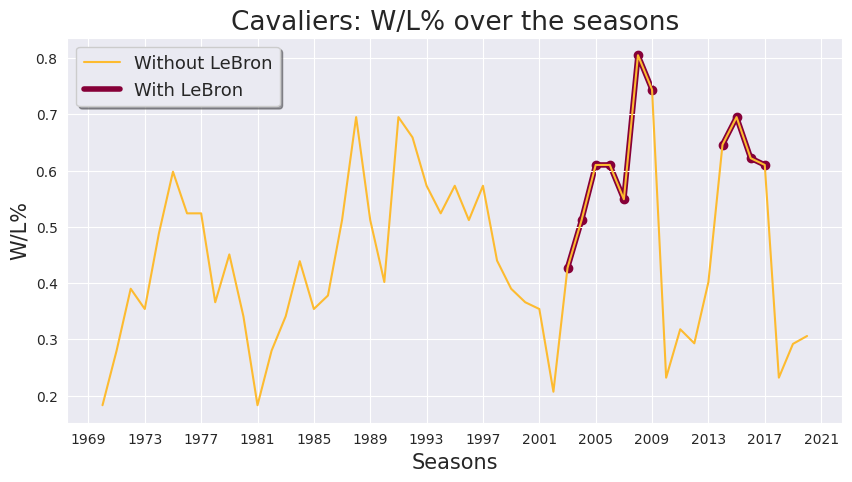

In [6]:
# size of the plot
plt.rcParams['figure.figsize'] = [10, 5]

# to manipulate intervals by which years are displayed (default: 4)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=4))

plt.plot(df['seasons'], df[stat_name], color='#FDBB30')
plt.scatter(df['seasons'][33:40], df[stat_name][33:40], color='#860038')
plt.scatter(df['seasons'][44:48], df[stat_name][44:48], color='#860038')
plt.plot(df['seasons'][33:40], df[stat_name][33:40], color='#860038', lw=4, zorder=-1)
plt.plot(df['seasons'][44:48], df[stat_name][44:48], color='#860038', lw=4, zorder=-1)
plt.legend(shadow=True, labels=['Without LeBron', 'With LeBron'], prop={'size': 13})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Seasons", size=15)
plt.ylabel("{}".format(stat_name), size=15)
plt.title("Cavaliers: {} over the seasons".format(stat_name), size=19)

# plt.axvspan(1984, 1992, color='white', alpha=0.4)
# plt.axvspan(1995, 1997, color='white', alpha=0.5)
plt.savefig('plots/lbj1.png')
plt.show()

## 2. LeBron's impact on Simple Rating System

In [7]:
from scipy.stats import mannwhitneyu, ttest_ind

stat_name = 'SRS'

mean_stat_with_lebron = np.mean(dfa[stat_name])
mean_stat_without_lebron = np.mean(dfb[stat_name])
print(mean_stat_with_lebron, mean_stat_without_lebron)

print(mannwhitneyu(dfa[stat_name], dfb[stat_name]))
print(ttest_ind(dfa[stat_name], dfb[stat_name]))

2.728182 -2.472
MannwhitneyuResult(statistic=81.0, pvalue=0.0007571738334426751)
Ttest_indResult(statistic=3.4233524011181657, pvalue=0.0012581731399157105)


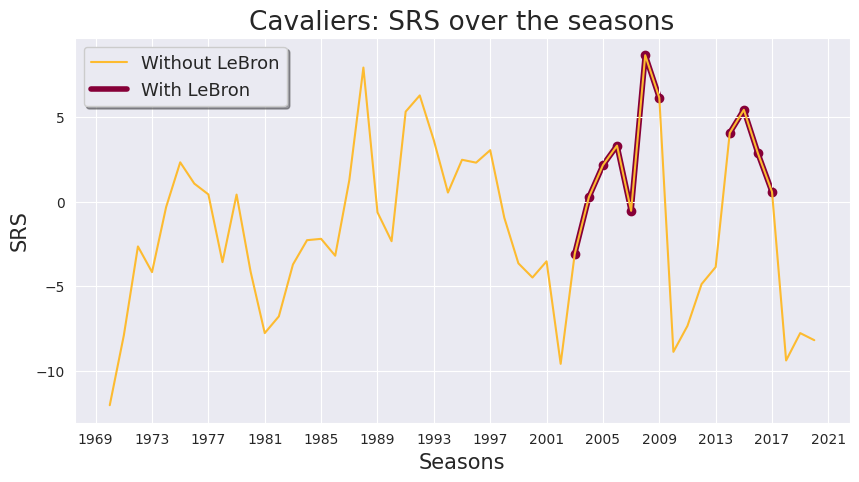

In [8]:
# size of the plot
plt.rcParams['figure.figsize'] = [10, 5]

# to manipulate intervals by which years are displayed (default: 4)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=4))

plt.plot(df['seasons'], df[stat_name], color='#FDBB30')
plt.scatter(df['seasons'][33:40], df[stat_name][33:40], color='#860038')
plt.scatter(df['seasons'][44:48], df[stat_name][44:48], color='#860038')
plt.plot(df['seasons'][33:40], df[stat_name][33:40], color='#860038', lw=4, zorder=-1)
plt.plot(df['seasons'][44:48], df[stat_name][44:48], color='#860038', lw=4, zorder=-1)
plt.legend(shadow=True, labels=['Without LeBron', 'With LeBron'], prop={'size': 13})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Seasons", size=15)
plt.ylabel("{}".format(stat_name), size=15)
plt.title("Cavaliers: {} over the seasons".format(stat_name), size=19)

# plt.axvspan(1984, 1992, color='white', alpha=0.4)
# plt.axvspan(1995, 1997, color='white', alpha=0.5)
plt.savefig('plots/lbj2.png')
plt.show()

## 3. LeBron's impact on Relative Offensive Rating

In [9]:
from scipy.stats import mannwhitneyu, ttest_ind

stat_name = 'Rel ORtg'

mean_stat_with_lebron = np.mean(dfa[stat_name])
mean_stat_without_lebron = np.mean(dfb[stat_name])
print(mean_stat_with_lebron, mean_stat_without_lebron)

print(mannwhitneyu(dfa[stat_name], dfb[stat_name]))
print(ttest_ind(dfa[stat_name], dfb[stat_name]))

2.2636366 -1.7125
MannwhitneyuResult(statistic=64.0, pvalue=0.00018392228010883507)
Ttest_indResult(statistic=4.127177608162495, pvalue=0.0001420981600380837)


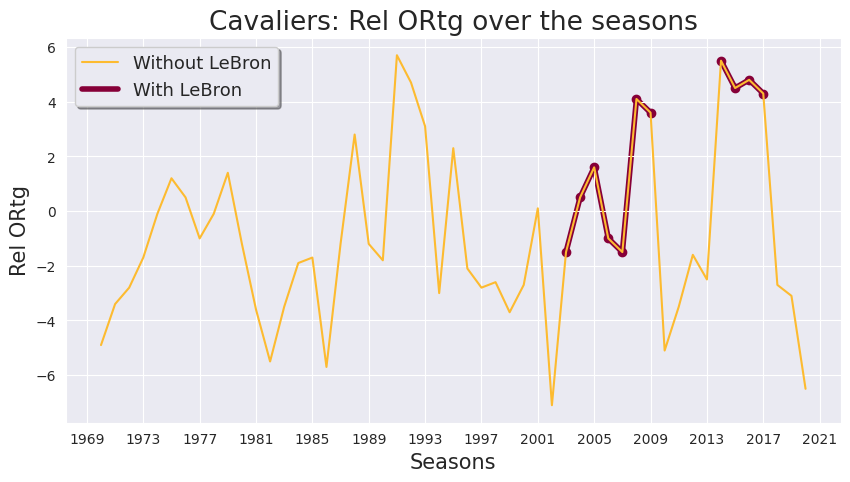

In [10]:
# size of the plot
plt.rcParams['figure.figsize'] = [10, 5]

# to manipulate intervals by which years are displayed (default: 4)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=4))

plt.plot(df['seasons'], df[stat_name], color='#FDBB30')
plt.scatter(df['seasons'][33:40], df[stat_name][33:40], color='#860038')
plt.scatter(df['seasons'][44:48], df[stat_name][44:48], color='#860038')
plt.plot(df['seasons'][33:40], df[stat_name][33:40], color='#860038', lw=4, zorder=-1)
plt.plot(df['seasons'][44:48], df[stat_name][44:48], color='#860038', lw=4, zorder=-1)
plt.legend(shadow=True, labels=['Without LeBron', 'With LeBron'], prop={'size': 13})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Seasons", size=15)
plt.ylabel("{}".format(stat_name), size=15)
plt.title("Cavaliers: {} over the seasons".format(stat_name), size=19)

# plt.axvspan(1984, 1992, color='white', alpha=0.4)
# plt.axvspan(1995, 1997, color='white', alpha=0.5)
plt.savefig('plots/lbj3.png')
plt.show()

## 4. LeBron's impact on Relative Defensive Rating

In [11]:
from scipy.stats import mannwhitneyu, ttest_ind

stat_name = 'Rel DRtg'

mean_stat_with_lebron = np.mean(dfa[stat_name])
mean_stat_without_lebron = np.mean(dfb[stat_name])
print(mean_stat_with_lebron, mean_stat_without_lebron)

print(mannwhitneyu(dfa[stat_name], dfb[stat_name]))
print(ttest_ind(dfa[stat_name], dfb[stat_name]))

-1.090909 0.8549999
MannwhitneyuResult(statistic=143.0, pvalue=0.039849494604539064)
Ttest_indResult(statistic=-1.9416353090609826, pvalue=0.05794263324741424)


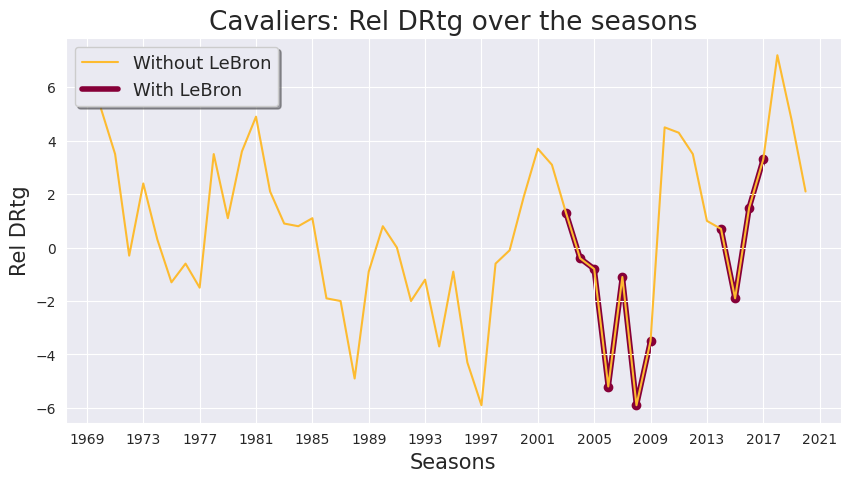

In [12]:
# size of the plot
plt.rcParams['figure.figsize'] = [10, 5]

# to manipulate intervals by which years are displayed (default: 4)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=4))

plt.plot(df['seasons'], df[stat_name], color='#FDBB30')
plt.scatter(df['seasons'][33:40], df[stat_name][33:40], color='#860038')
plt.scatter(df['seasons'][44:48], df[stat_name][44:48], color='#860038')
plt.plot(df['seasons'][33:40], df[stat_name][33:40], color='#860038', lw=4, zorder=-1)
plt.plot(df['seasons'][44:48], df[stat_name][44:48], color='#860038', lw=4, zorder=-1)
plt.legend(shadow=True, labels=['Without LeBron', 'With LeBron'], prop={'size': 13})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Seasons", size=15)
plt.ylabel("{}".format(stat_name), size=15)
plt.title("Cavaliers: {} over the seasons".format(stat_name), size=19)

# plt.axvspan(1984, 1992, color='white', alpha=0.4)
# plt.axvspan(1995, 1997, color='white', alpha=0.5)
plt.savefig('plots/lbj4.png')
plt.show()

 # Win Share bar plots

In [13]:
# cleaning the data of win share leaders (Top WS column in our dataframe)
player_names = []
player_ws = []
for c in df['Top WS']:
#     print(c.split()[2].strip('()'), c.split()[:2])
    d = c.split()[0] + c.split()[1] 
    player_ws += [c.split()[2].strip('()')]
    player_names += [d]
player_ws = np.array(player_ws, dtype=float)
print(player_names, player_ws)
player_names = np.array(player_names)
df['WS'] = player_ws
df['WS player'] = player_names

print(len(np.unique(player_names)))

['W.Wesley', 'B.Beard', 'L.Wilkens', 'L.Wilkens', 'D.Snyder', 'J.Brewer', 'J.Chones', 'E.Smith', 'C.Russell', 'D.Robisch', 'M.Mitchell', 'J.Edwards', 'W.Free', 'W.Free', 'W.Free', 'R.Hinson', 'H.Williams', 'M.Price', 'M.Price', 'M.Price', 'L.Nance', 'L.Nance', 'B.Daugherty', 'M.Price', 'T.Hill', 'T.Brandon', 'T.Brandon', 'W.Person', 'S.Kemp', 'A.Miller', 'C.Weatherspoon', 'A.Miller', 'C.Boozer', 'C.Boozer', 'L.James', 'L.James', 'L.James', 'L.James', 'L.James', 'L.James', 'R.Sessions', 'K.Irving', 'K.Irving', 'K.Irving', 'K.Irving', 'L.James', 'L.James', 'L.James', 'L.Nance', 'L.Nance', 'J.Allen'] [ 4.1  5.9  9.5  6.5  6.4  7.9  5.9  6.8  6.7  8.6  6.   4.3  4.6  5.3
  6.   7.4  7.5  7.8 11.3 10.1  9.8 12.2 12.7 10.   6.9 12.7 10.8 10.3
  6.3  5.3  8.6 10.3  5.9  9.4 14.3 16.3 13.7 15.2 20.3 18.5  4.4  4.1
  5.3  6.7 10.4 13.6 12.9 14.   4.9  3.9  5. ]
28


### Win share frequency plot to display the number of times a player was the team leader in win shares

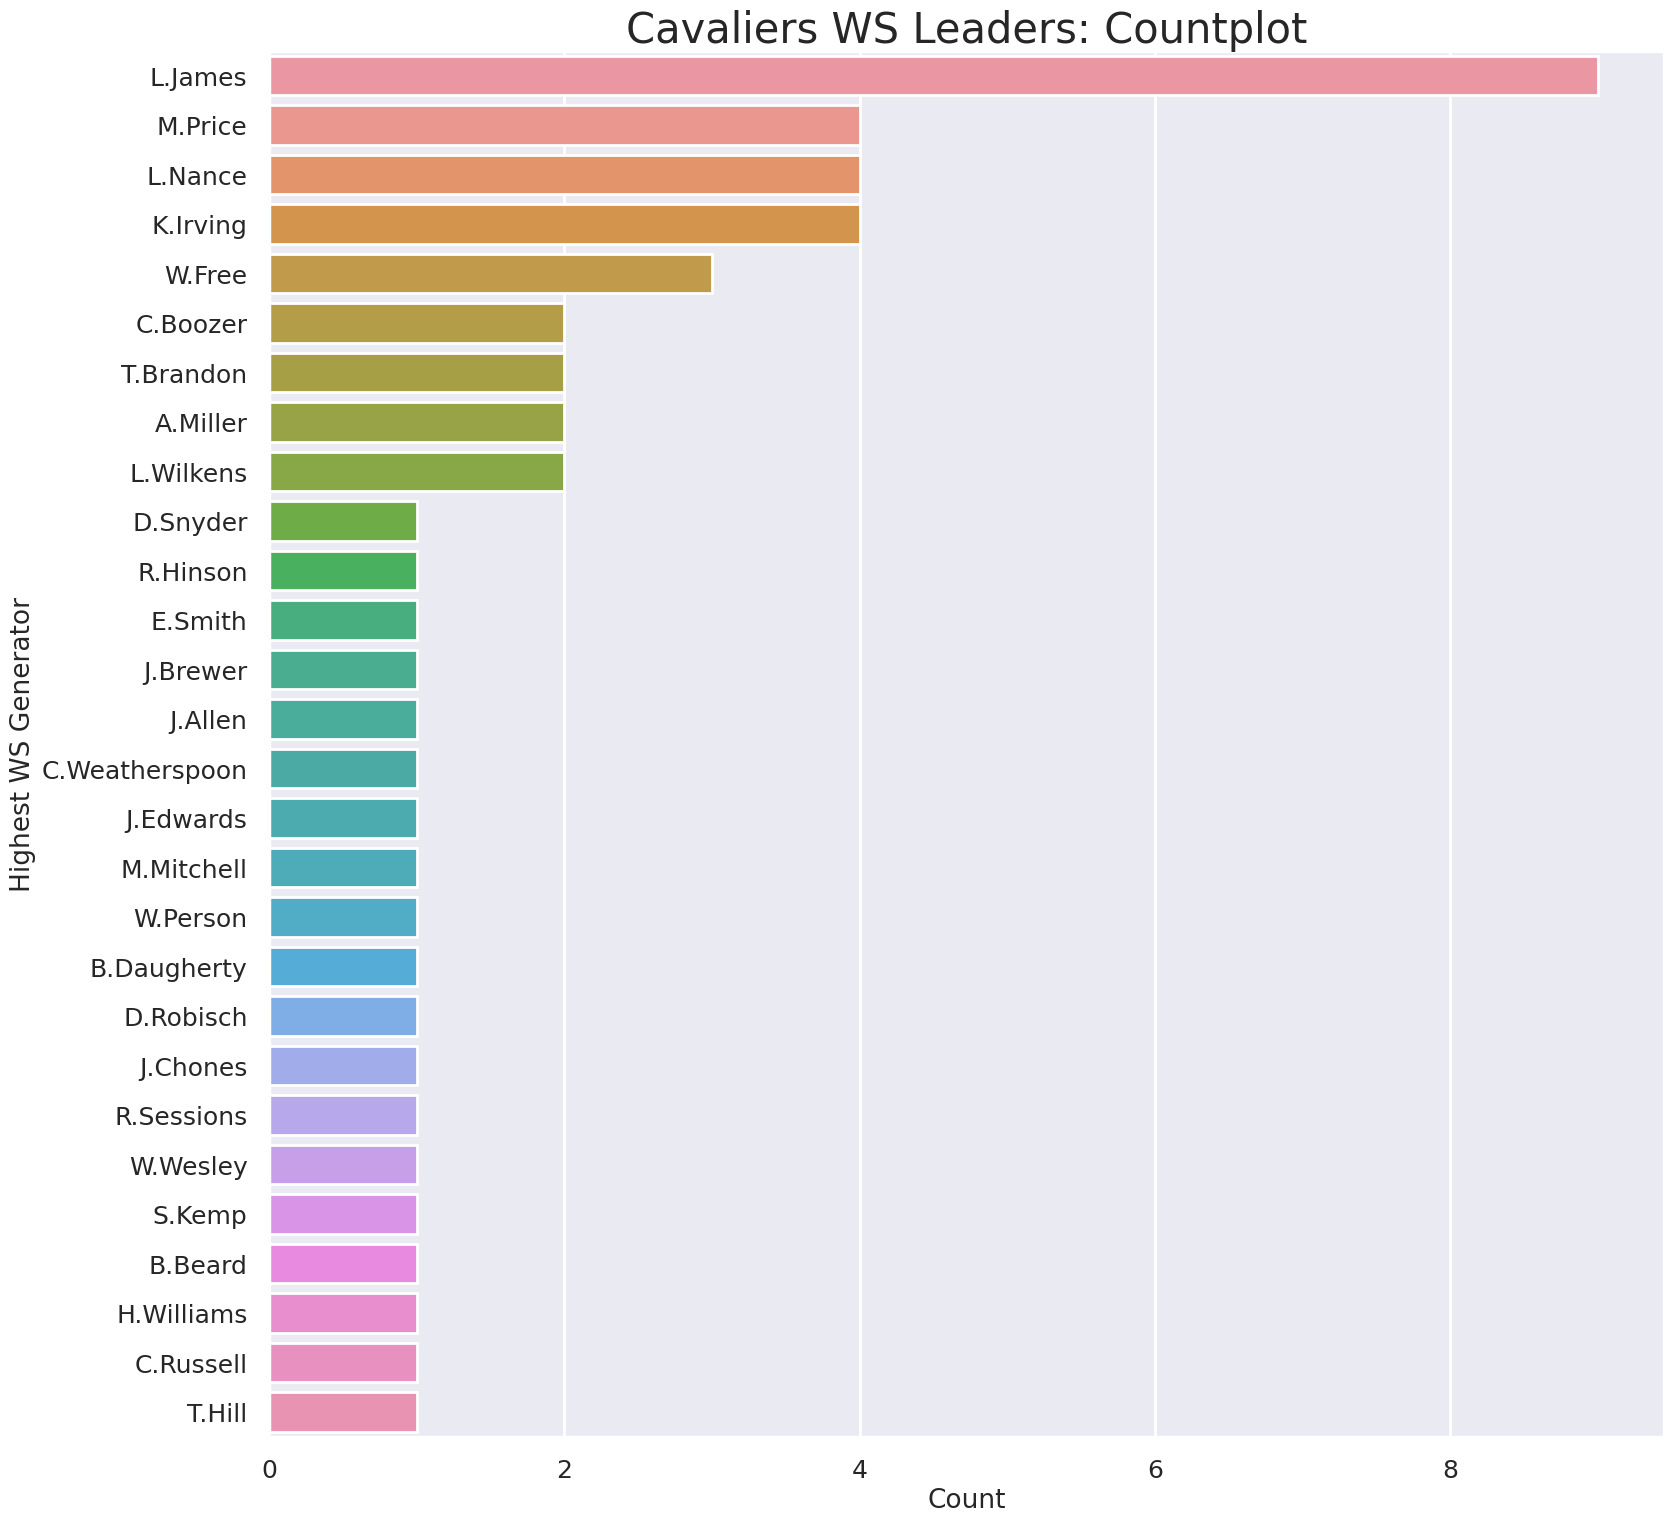

28


In [31]:
plt.tight_layout()
plt.rcParams['figure.figsize'] = (18, 18)
sns.set_context("poster")
plt.title("Cavaliers WS Leaders: Countplot", size=30)
sns.countplot(y="WS player", data=df, order = df['WS player'].value_counts().index)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel("Highest WS Generator", size=19)
plt.xlabel("Count", size=19)
plt.savefig('plots/lbjws1.png')
plt.show()
# print(df['WS name'])
print(len(np.unique(player_names)))

### Win Share Leaders Box Plot

<Figure size 1800x1800 with 0 Axes>

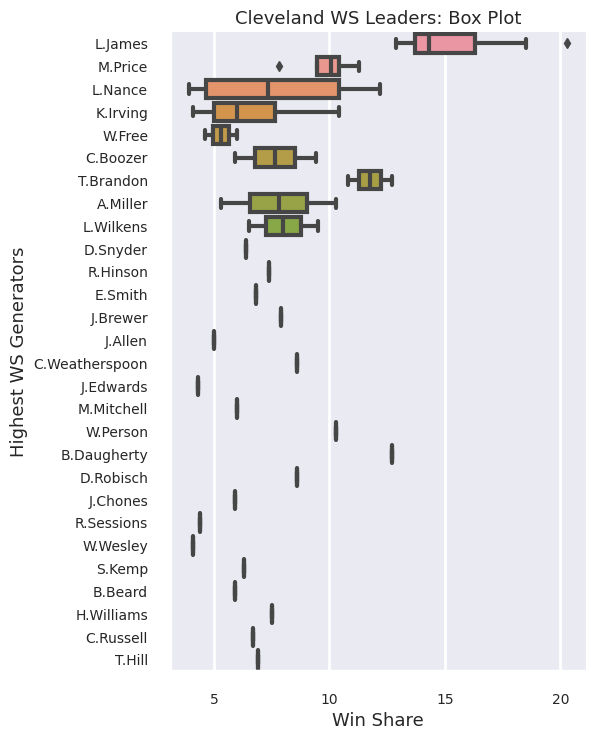

In [32]:
plt.tight_layout()
plt.rcParams['figure.figsize'] = (4, 16)
sns.set_context("poster")
sns.catplot(y="WS player", x="WS", kind="box", data=df, height=8, aspect=1, order = df['WS player'].value_counts().index)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Cleveland WS Leaders: Box Plot", size=13)
plt.ylabel("Highest WS Generators", size=13)
plt.xlabel("Win Share", size=13)
plt.savefig('plots/lbjws2.png')
plt.show()